In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as plt
data = yf.download("NYKAA.NS", start="2022-04-28", end="2022-05-30",interval="60m")

[*********************100%***********************]  1 of 1 completed


In [6]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA13'] = data['Close'].rolling(13).mean()
data.dropna(inplace=True)
#data.index.strftime("%m/%d/%Y, %r")
#data.index.format()
#type(data.index)
#data.DatatimeIndex.strftime()

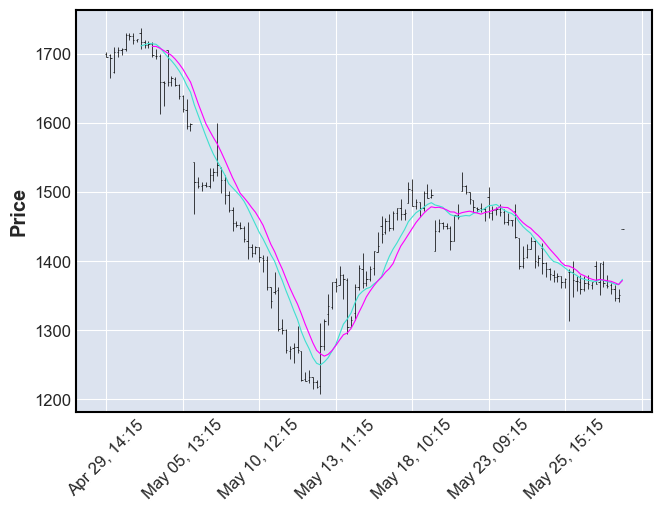

In [7]:
#x = data.index
#plt.plot(data.index,data[['Close','MA15']])
#data.plot(show_nontrading=False)
plt.plot(data,mav=(10,13))
#data[['Close','MA15']].plot(figsize=(32,16))

In [12]:
balance = 2000000
initial_balance = balance
profit = 0
stock = 0
for i in range(0,len(data)):
    if(data['MA10'][i] > data['MA13'][i] and balance > data['Close'][i] and data['MA10'][i]):
        if(stock==0):
            stock +=1
        elif(stock*data['Close'][i] < balance):
            balance = balance-(stock*data['Close'][i])
            stock+=stock
        else:
            stock+= (balance/data['Close'][i])
            balance = balance%data['Close'][i]
    elif(data['MA10'][i] < data['MA13'][i] and stock > 0):
        if(stock == 1):
            stock=0
            balance+=data['Close'][i]
        else:
            if(stock%2 == 1):
                stock = stock/2
                balance+= stock*data['Close'][i]
                stock+=1
            else:
                stock = stock/2
                balance+= stock*data['Close'][i]
    # elif(data['MA10'][i] < data['MA13'][i] and stock > 0):
    #     balance+= stock*data['Close'][i]
    #     stock = 0
print(balance-initial_balance)



39999.76571880258
